# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [87]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [596]:
# read the data
data = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here

df.shape
# Rows 1898 & Columns 9

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [567]:
# Use info() to print a concise summary of the DataFrame
df.info()

 #   Column                 Non-Null Count  Dtype  
#---  ------                 --------------  -----  
 #0   order_id               1898 non-null   int64  
# 1   customer_id            1898 non-null   int64  
 #2   restaurant_name        1898 non-null   object 
 #3   cuisine_type           1898 non-null   object 
 #4   cost_of_the_order      1898 non-null   float64
# 5   day_of_the_week        1898 non-null   object 
 #6   rating                 1898 non-null   object 
 #7   food_preparation_time  1898 non-null   int64  
 #8   delivery_time          1898 non-null   int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 123.1+ KB


#### Observations:


### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [19]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data

# Use info() to print a concise summary of the DataFrame
df.info()
df['restaurant_name'] = df['restaurant_name'].astype('category')
df['cuisine_type'] = df['cuisine_type'].astype('category')
df['day_of_the_week'] = df['day_of_the_week'].astype('category')

df.info()
#Yes after coverting to category it reduced the memory.

#Before coverting to category
 #dtypes: category(1), float64(1), int64(4), object(3)
#memory usage: 127.9+ KB
#<class 'pandas.core.frame.DataFrame'>
#RangeIndex: 1898 entries, 0 to 1897
    
# After coverting to category

#dtypes: category(3), float64(1), int64(4), object(1)
#memory usage: 102.7+ KB



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   object  
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   object  
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 127.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id         

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [24]:
# Write your code here
df['food_preparation_time'].describe()
#Time it takes for food to be prepared once an order is placed
#Minimum =20
#Average=27.37
#Maximum =35

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [29]:
my_tab = pd.crosstab(index=df["rating"],  # Make a crosstab
                     columns="order_id")                  # Name the count column
my_tab

# Orders are not rated = 736 

col_0,order_id
rating,
3,188
4,386
5,588
Not given,736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

array([[<AxesSubplot:title={'center':'order_id'}>,
        <AxesSubplot:title={'center':'customer_id'}>],
       [<AxesSubplot:title={'center':'cost_of_the_order'}>,
        <AxesSubplot:title={'center':'food_preparation_time'}>],
       [<AxesSubplot:title={'center':'delivery_time'}>, <AxesSubplot:>]],
      dtype=object)

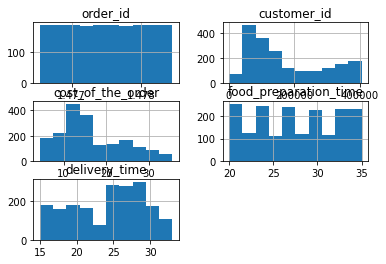

In [39]:
###histograms

hist = df.hist()
hist

<AxesSubplot:>

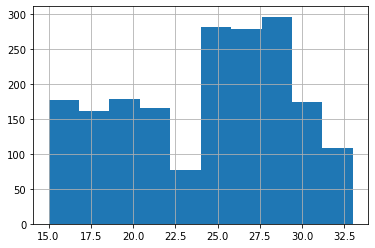

In [73]:
df['delivery_time'].hist()
#The most deliver time is between 24.5 and 29


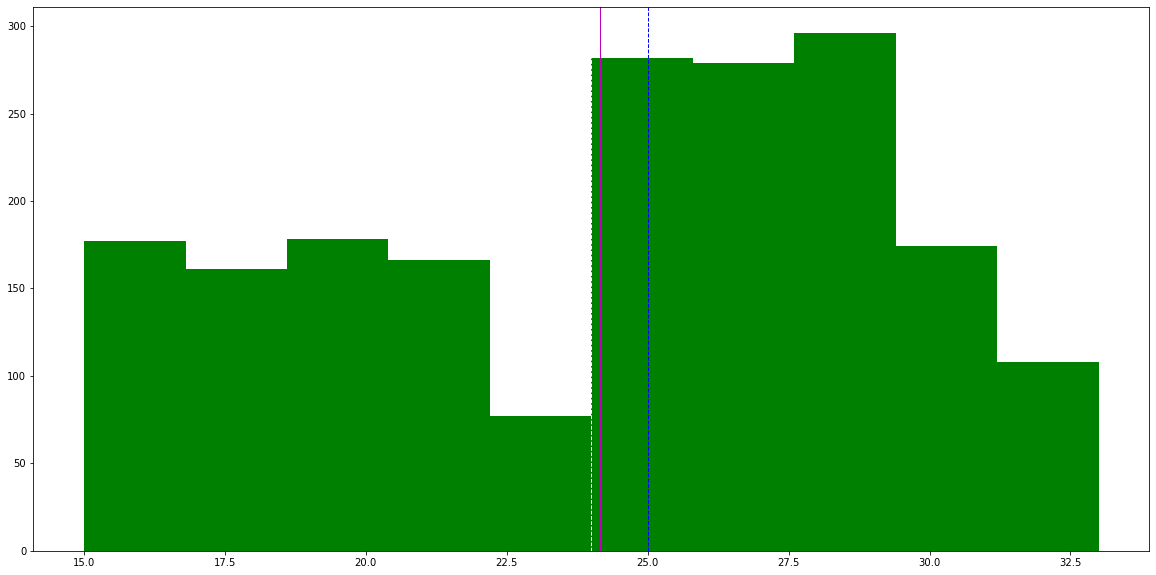

In [75]:
plt.figure(figsize=(20,10)) 
plt.hist(df['delivery_time'], color='g')
plt.axvline(df['delivery_time'].mean(), color='m', linewidth=1)
plt.axvline(df['delivery_time'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['delivery_time'].mode()[0], color='w', linestyle='dashed', linewidth=1)

<AxesSubplot:>

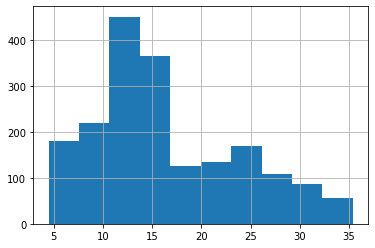

In [74]:
df['cost_of_the_order'].hist()

#The most of the cost of the order is in between 11 and 14


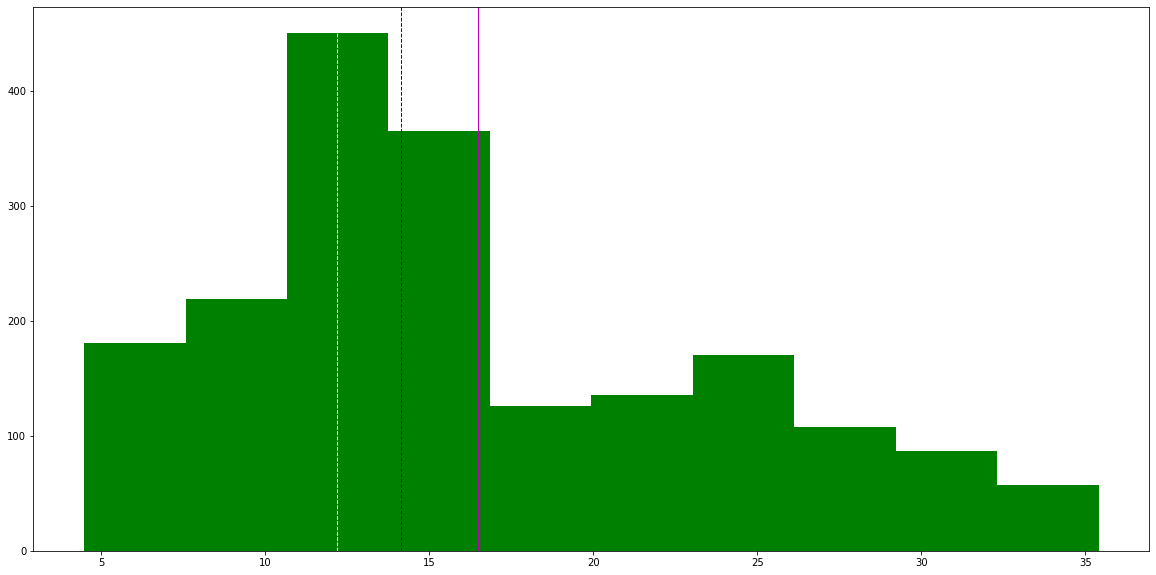

In [71]:
plt.figure(figsize=(20,10)) 
plt.hist(df['cost_of_the_order'], color='g')
plt.axvline(df['cost_of_the_order'].mean(), color='m', linewidth=1)
plt.axvline(df['cost_of_the_order'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['cost_of_the_order'].mode()[0], color='w', linestyle='dashed', linewidth=1)

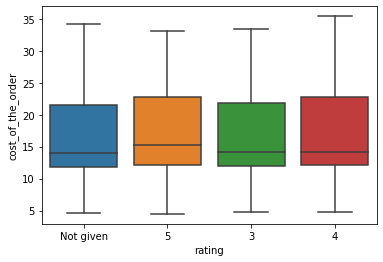

In [80]:
sns.boxplot(y='cost_of_the_order',x='rating',data=df)
plt.show()

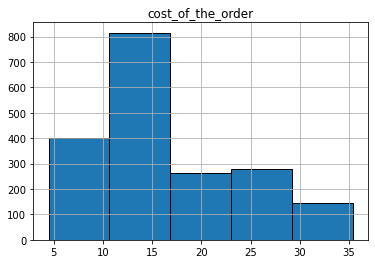

In [644]:
#histograms
data.hist('cost_of_the_order', bins=5, edgecolor="black");



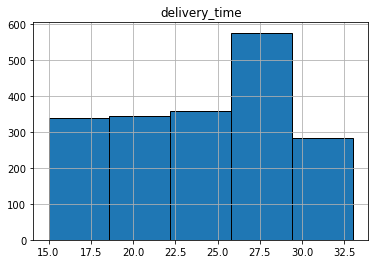

In [640]:
data.hist('delivery_time', bins=5, edgecolor="black");

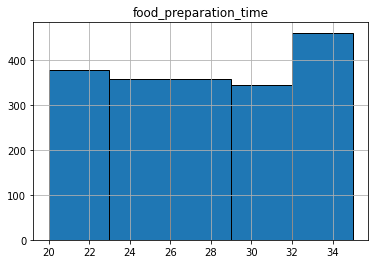

In [641]:
data.hist('food_preparation_time', bins=5, edgecolor="black");

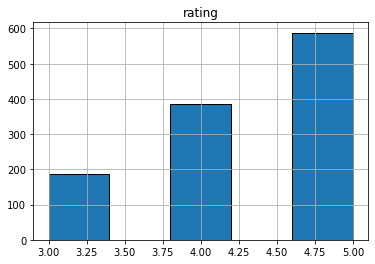

In [656]:
df.hist('rating', bins=5, edgecolor="black");

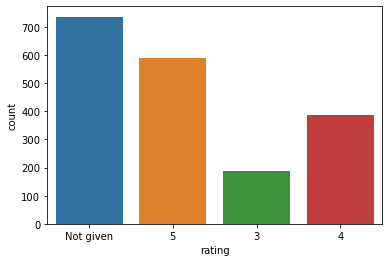

In [654]:
#countplots

sns.countplot(x ='rating', data = data)
 
# Show the plot
plt.show()

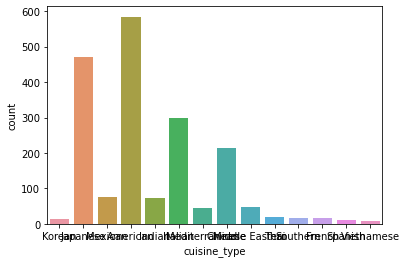

In [653]:
df
sns.countplot(x ='cuisine_type', data = data)
 
# Show the plot
plt.show()

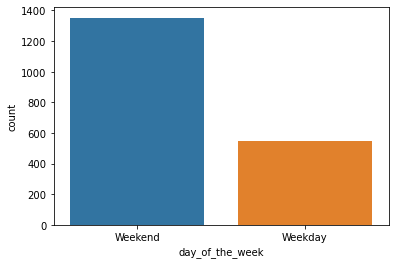

In [652]:
sns.countplot(x ='day_of_the_week', data = data)
 
# Show the plot
plt.show()

In [649]:
df


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [97]:
# Write the code here

 
top = df.groupby(['restaurant_name'])['order_id'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
  
print(top)

#Top 5 restaurants in terms of the number of orders received

 #              restaurant_name  Count
#                Shake Shack    219
#          The Meatball Shop    132
#           Blue Ribbon Sushi    119
#   Blue Ribbon Fried Chicken     96
#                       Parm     68



               restaurant_name  Count
136                Shake Shack    219
153          The Meatball Shop    132
21           Blue Ribbon Sushi    119
20   Blue Ribbon Fried Chicken     96
109                       Parm     68
..                         ...    ...
85                       Klong      1
83           Kambi Ramen House      1
77                  Il Bambino      1
76                 Hunan Manor      1
89               Lamarca Pasta      1

[178 rows x 2 columns]


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [158]:
# Write the code here
#the most popular cuisine on weekends -American(415)
weekends = df[df['day_of_the_week'] == 'Weekend']
weekends.groupby(['cuisine_type'])['day_of_the_week'].count()


cuisine_type
American          415
Chinese           163
French             13
Indian             49
Italian           207
Japanese          335
Korean             11
Mediterranean      32
Mexican            53
Middle Eastern     32
Southern           11
Spanish            11
Thai               15
Vietnamese          4
Name: day_of_the_week, dtype: int64

In [156]:
df.groupby(['day_of_the_week']).count()['cuisine_type']

#df['cost_of_the_order'].values_counts() 

day_of_the_week
Weekday     547
Weekend    1351
Name: cuisine_type, dtype: int64

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [265]:
# Write the code here

df['cost_of_the_order'].describe()

dfp=df[df['cost_of_the_order']>20]

x= dfp['cost_of_the_order'].count()

more=x*100/y
print('Percentage orders cost more than 20$=',more, '%','\nTotal orders cost more than 20$=', x)
#Percentage orders cost more than 20$= 29.24% 
# Total orders cost more than 20$= 555


Percentage orders cost more than 20$= 29.24130663856691 % 
Total orders cost more than 20$= 555


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [162]:
# Write the code here

df['delivery_time'].describe()


#The mean order delivery time- 24.161749

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

#### Observations:


In [271]:
 
ID = df.groupby(['customer_id'])['order_id'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
  
print(ID)

# customer_id  Count
# 52832        13
# 47440        10
# 83287         9
# 250494        8
# 65009         7


      customer_id  Count
116         52832     13
84          47440     10
333         83287      9
839        250494      8
216         65009      7
...           ...    ...
478        105903      1
479        105992      1
480        106006      1
481        106324      1
1199       405334      1

[1200 rows x 2 columns]


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [604]:
data.corr() 

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


In [608]:
data1 = data.dropna().reset_index(drop=True)
data1.count()

order_id                 1898
customer_id              1898
restaurant_name          1898
cuisine_type             1898
cost_of_the_order        1898
day_of_the_week          1898
rating                   1898
food_preparation_time    1898
delivery_time            1898
dtype: int64

<AxesSubplot:>

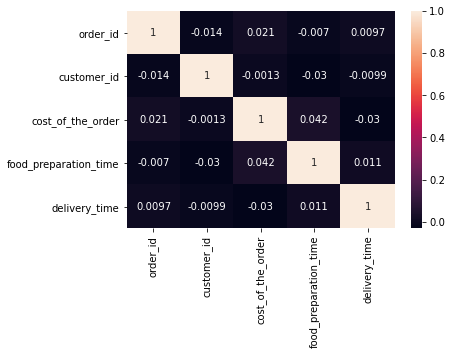

In [605]:
sns.heatmap(data.corr(), annot=True) 

<AxesSubplot:xlabel='day_of_the_week', ylabel='delivery_time'>

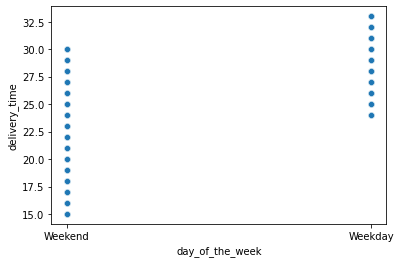

In [618]:
sns.scatterplot( data = data1,x = 'day_of_the_week', y ='delivery_time' )

#Delivery time is higher in weekday compare to weekend .

#<AxesSubplot:xlabel='day_of_the_week', ylabel='delivery_time'>

<AxesSubplot:xlabel='day_of_the_week', ylabel='food_preparation_time'>

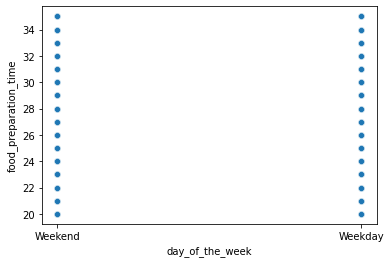

In [619]:
sns.scatterplot( data = data1,x = 'day_of_the_week', y ='food_preparation_time' )

#Food prepartion time is same for weekend and weekday 

<AxesSubplot:xlabel='day_of_the_week', ylabel='cost_of_the_order'>

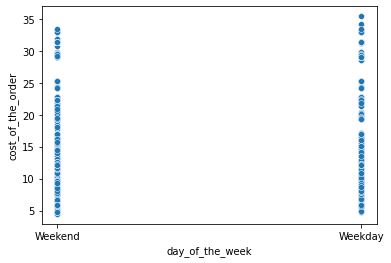

In [657]:
sns.scatterplot( data = data1,x = 'day_of_the_week', y ='cost_of_the_order' )

#Cost of the order is stligtily higer in weekday compare to weekend



<AxesSubplot:xlabel='cost_of_the_order', ylabel='rating'>

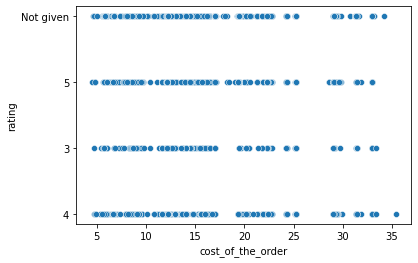

In [626]:
#sns.scatterplot( data = data1,x = 'rating', y ='cost_of_the_order' )

sns.scatterplot( data = data1,x = 'cost_of_the_order', y ='rating' )
#The most five rating is around the proce range of 5-15


<AxesSubplot:xlabel='rating', ylabel='cuisine_type'>

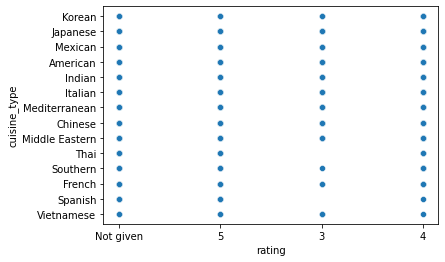

In [630]:
sns.scatterplot( data = data1,x = 'rating', y ='cuisine_type' )


#sns.scatterplot( data = data1,x = 'cuisine_type', y ='rating' sort=acending)
#Spanish,Thai cuisine_type  have no 3 rating

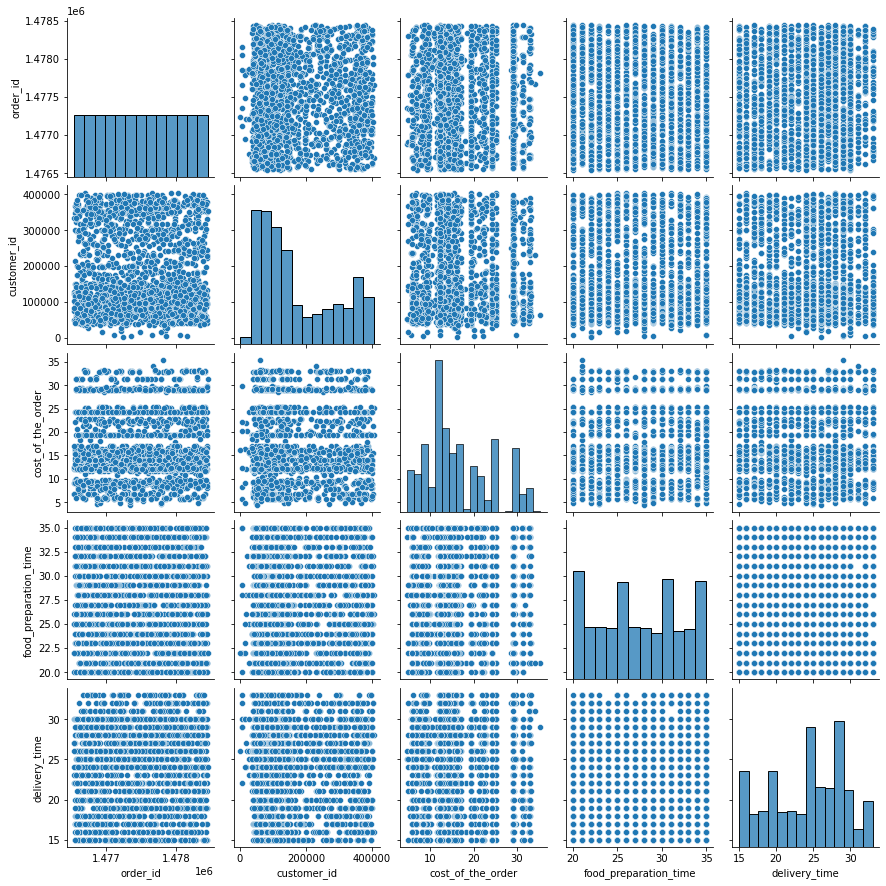

In [607]:

sns.pairplot(data)


<AxesSubplot:xlabel='delivery_time', ylabel='rating'>

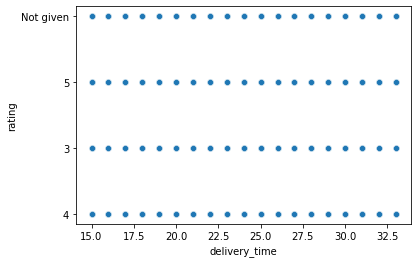

In [632]:
sns.scatterplot(data1['delivery_time'], data1['rating']) 

<AxesSubplot:xlabel='cuisine_type', ylabel='order_id'>

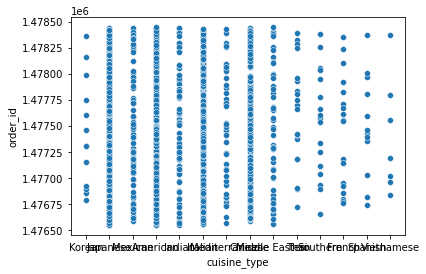

In [671]:
sns.scatterplot(data['cuisine_type'], data['order_id']) 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [279]:
# Write the code here

#Shake Shack 
#The Meatball Shop 
#Blue Ribbon Sushi 
#Blue Ribbon Fried Chicken 

my_tab = pd.crosstab(index=df["rating"],  
                     columns="order_id")                  
my_tab

col_0,order_id
rating,
3,188
4,386
5,588
Not given,736


In [285]:
ID = df.groupby(['restaurant_name'])['rating'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
  
I= ID.head(10)
I

,restaurant_name,Count
136,Shake Shack,219
153,The Meatball Shop,132
21,Blue Ribbon Sushi,119
20,Blue Ribbon Fried Chicken,96
109,Parm,68
121,RedFarm Broadway,59
122,RedFarm Hudson,55
145,TAO,49
66,Han Dynasty,46
22,Blue Ribbon Sushi Bar & Grill,44


In [292]:
P=df
P
P.count()

order_id                 1898
customer_id              1898
restaurant_name          1898
cuisine_type             1898
cost_of_the_order        1898
day_of_the_week          1898
rating                   1898
food_preparation_time    1898
delivery_time            1898
dtype: int64

In [293]:
P.drop(P.index[P['rating'] == 'Not given'], inplace = True)

In [551]:
P.count()
P['rating'] = P['rating'].astype('int64')
P.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 123.1+ KB


In [499]:
k = P.groupby('restaurant_name')['rating'].agg(['sum','count'],ascending=True)
k.info()


<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 'wichcraft to indikitch
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sum     156 non-null    int64
 1   count   156 non-null    int64
dtypes: int64(2)
memory usage: 3.7+ KB


In [500]:
sumcount=k.sort_values(by=['sum','count'], ascending=False) 
sumcount.head(10)



,sum,count
restaurant_name,,
Shake Shack,569,133
The Meatball Shop,379,84
Blue Ribbon Sushi,308,73
Blue Ribbon Fried Chicken,277,64
RedFarm Broadway,174,41
Parm,161,39
RedFarm Hudson,142,34
TAO,122,28
Han Dynasty,102,23


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [550]:
# Write the code here
#The net revenue generated by the company across all orders 3865.572
Twe=df[df['cost_of_the_order']>20]
Five=df[df['cost_of_the_order']<=20]
Fivenew=Five[Five['cost_of_the_order']>5]
netTwe=Twe['cost_of_the_order'].sum()
netFive=Fivenew['cost_of_the_order'].sum()
#Find the net revenue the restaurant 
newnetTwe=netTwe*25/100
newnetFive=netFive*15/100
Total=newnetTwe+newnetFive
print('The net revenue generated by the company across all orders',Total)

The net revenue generated by the company across all orders 3865.572


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [597]:
#Percentage of orders take more than 60 minutes to get delivered 10.240963855421686 %
# Write the code here
timep=data['food_preparation_time']+data['delivery_time']
more=timep>60
newmore=sum(more)
newmore
Morethan=newmore*100/more.count()
print('Percentage of orders take more than 60 minutes to get delivered',Morethan,'%')


Percentage of orders take more than 60 minutes to get delivered 10.53740779768177 %


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [406]:
# Write the code here
#The mean delivery time vary during weekdays and weekends
#Weekday    28.305882
#Weekend    22.436740
df.groupby(['day_of_the_week']).mean()['delivery_time']

day_of_the_week
Weekday    28.305882
Weekend    22.436740
Name: delivery_time, dtype: float64

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

###### After analyzing the FoodHub data able to conclude below findings.

•	Restaurant Shake Shack appears most often.
•	Spanish, Thai always have good rating and don’t have rating less than 4.
•	Food preparation time is same for weekend and weekdays
•	Delivery time is higher in weekdays compare to weekend
•	The most five star rating is for the price range of $5-15 
•	Cost of the order is slightly higher in weekdays compare to weekend 

###### Below are the recommendation to improve the business and enhance customer experience.
Delivery time is higher in weekdays compare to weekend, so our suggestion is hiring more delivery person on weekday.
The most five-star rating is around the price range of$ 5-15 which falls in the more inexpensive category; possibly these are orders from college students hence, company needs to come up with plans to attract more larger orders from corporate businesses etc.   
###### Further Analysis
For the Further Analysis of the dataset we need more data about date and time so we can analyze and find out hours and days of demand therefore, enhancing better customer experiences.
